# **CaseStudy 03 : IMDB Movie Reviews Analysis** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DS-Python/blob/main/Pandas/CaseStudies/IMDBMovieReview/Notebooks/122_imdb_movie_reviews.ipynb)

|🔴 **NOTE** 🔴|
|:-----------:|
|This notebook contains the practical implementations of the analysis planned in the article.|
| Here is Article 122 - [IMDB Movie Reviews Analysis](../Articles/122_imdb_movie_reviews.md) |

### 📦 **Importing Relevant Libraries**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

**Downloading Relevant Data**

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

### ⚠️ **Data Warning**
For the code ahead we are going to use the IMDB Movie Reviews Data which is in the [Data](../Data/) folder or you can download it from the Kaggle.  
Kaggle Data : [Download](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data)

To know about the Data more...  [Click Here](https://ai.stanford.edu/~amaas/data/sentiment/)

In [2]:
imdb_df = pd.read_csv(
    filepath_or_buffer = '../Data/IMDBMovieReviewsDataset.csv'
)

### 🫧 **Data Cleaning**

#### **1. Lowercasing the Reviews**

In [3]:
imdb_df['review'] = imdb_df['review'].str.lower()

#### **2. Removing Leading & Trailing Spaces**

In [4]:
imdb_df['review'] = imdb_df['review'].str.strip()

#### **3. Removing HTML Tags**

**Helper Function**

In [5]:
def remove_html(data):
    
    '''
    Removes all HTML tags from the data.
    '''
    
    data = re.sub(r'<.*?>', '', data)
    
    return data

In [6]:
imdb_df['review'] = imdb_df['review'].apply(
    func = remove_html
)

#### **4. Removing URLs**

**Helper Function**

In [7]:
def remove_url(data):
    
    '''
    Removes all the URL from the data.
    '''
    
    data = re.sub(r"https?://\S+|www\.\S+", '', data)
    
    return data

In [8]:
imdb_df['review'] = imdb_df['review'].apply(
    func = remove_url
)

#### **5. Expanding Abbreviations**

**Helper Function**

In [9]:
def remove_abb(data):
    
    '''
    Replaces all the abbreviations with their expanded form.
    '''
    
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data = re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [10]:
imdb_df['review'] = imdb_df['review'].apply(
    func = remove_abb
)

#### **6. Removing Punctuations**

In [11]:
def remove_punctuations(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i, '')
    return text

In [12]:
imdb_df['review'] = imdb_df['review'].apply(
    func = remove_punctuations
)

#### **7. Removing Special Characters**

In [13]:
def remove_special_chars(text):
    return re.sub(
        pattern = r'[^\w\s]',
        repl = '',
        string = text
    )

In [14]:
imdb_df['review'] = imdb_df['review'].apply(
    func = remove_special_chars
)

### ⚗️ **Data Preprocessing**

#### **1. Tokenization**

In [15]:
imdb_df['tokenized_review'] = imdb_df['review'].apply(
    func= word_tokenize
)

#### **2. Removing StopWords**

In [16]:
def remove_stopwords(tokens :list):
    l = []
    
    for word in tokens:
        if word not in stopwords.words('english'):
            l.append(word)
            
    return l

In [17]:
imdb_df['tokenized_review'] = imdb_df['tokenized_review'].apply(
    func = remove_stopwords
)

#### **3. Creating Processed Review Column**

In [18]:
imdb_df['processed_review'] = imdb_df['tokenized_review'].apply(
    func = lambda x : ' '.join(x)
)

### 💡 **EDA & Feature Engineering**

In [3]:
imdb_df = pd.read_csv(
    filepath_or_buffer = '../Data/IMDBMovieProcessedBeforeEDA.csv'
)

#### **1. Creating Text Length Feature**

In [53]:
imdb_df['text_length'] = imdb_df['processed_review'].str.len()

#### **2. Creating Word Length Feature**

In [56]:
imdb_df['word_length'] = imdb_df['tokenized_review'].apply(
    func = lambda x : len(x)
)

#### **3. Creating UniGrams**

**Note :** Make sure `imdb_df['tokenized_review']` contains list of strings. Use `type()` to check it.

In [ ]:
unigrams = pd.Series(
    data = ngrams(
        sequence = imdb_df['tokenized_review'].sum(),
        n = 1
    )
).value_counts()

#### **4. Creating BiGrams**

In [ ]:
bigrams = pd.Series(
    data = ngrams(
        sequence = imdb_df['tokenized_review'].sum(),
        n = 2
    )
).value_counts()

#### **5. Creating TriGrams**

In [ ]:
trigrams = pd.Series(
    data = ngrams(
        sequence = imdb_df['tokenized_review'].sum(),
        n = 3
    )
).value_counts()

#### **6. Generating Wordcloud**

**Positive Reviews Wordcloud**

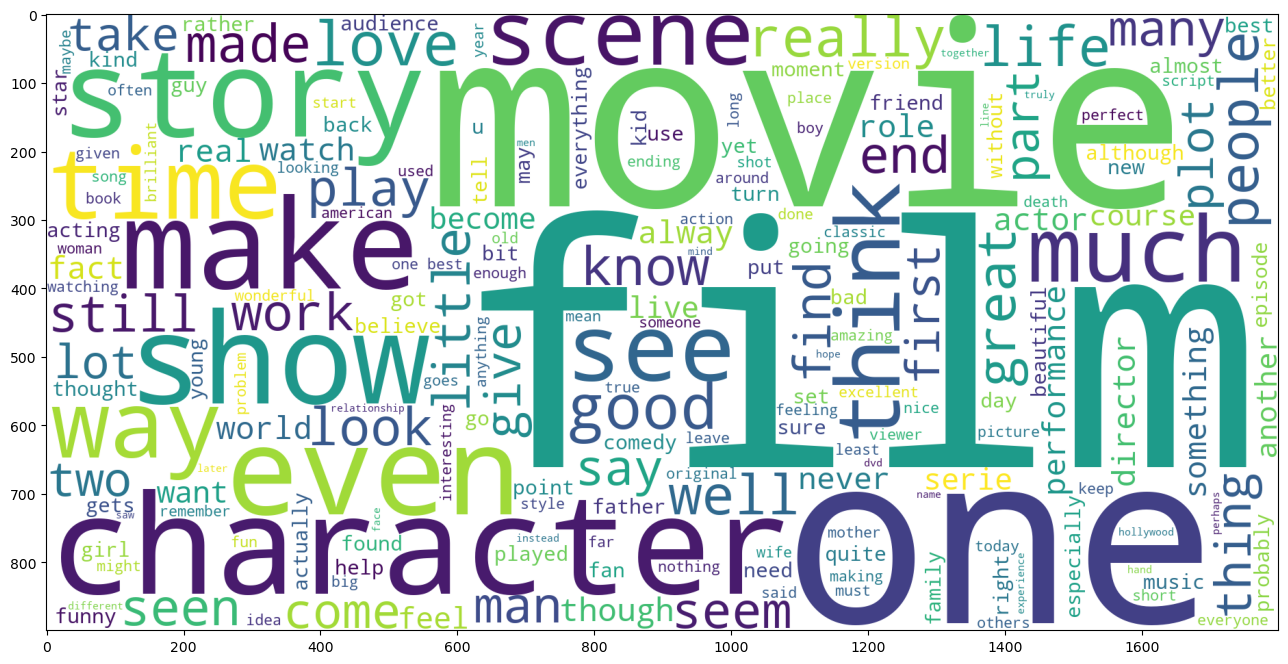

In [10]:
plt.figure(
    figsize = (20, 8)
)
word_cloud = WordCloud(
    width = 1800,
    height = 900,
    background_color = 'white'
).generate(
    text = ' '.join(
        imdb_df[imdb_df['sentiment'] == 'positive']['processed_review']
    )
)
plt.imshow(
    X = word_cloud
)
plt.show()

**Negative Reviews Wordcloud**

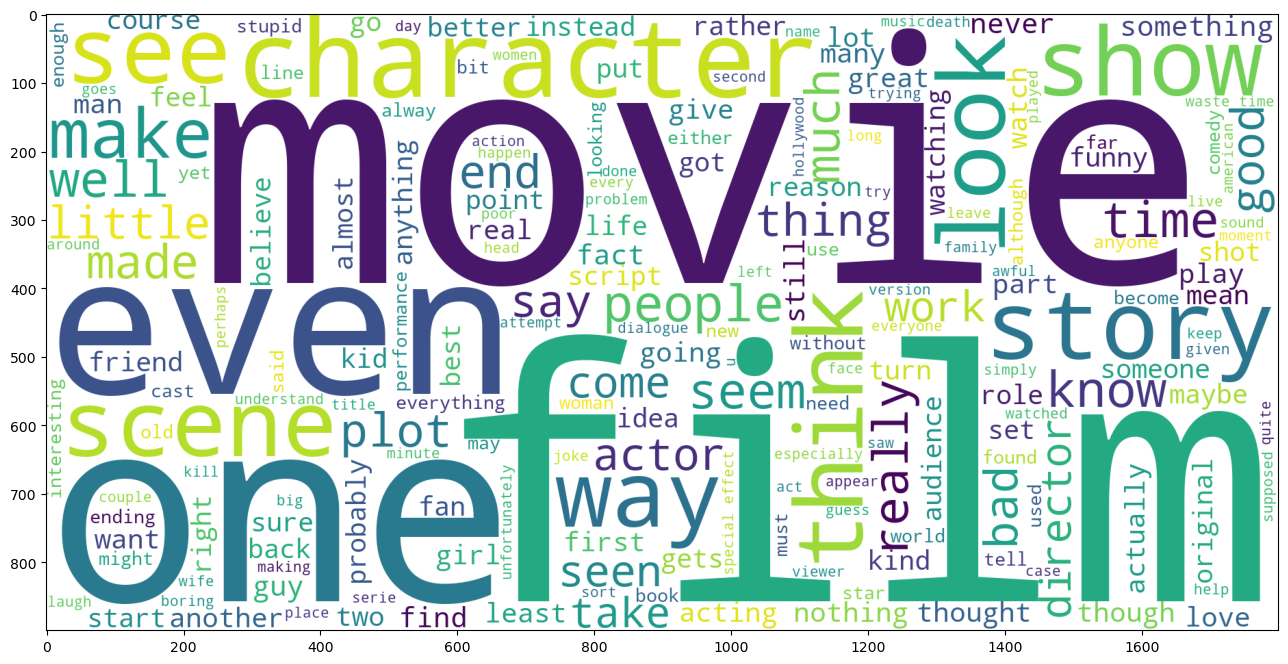

In [9]:
plt.figure(
    figsize = (20, 8)
)
word_cloud = WordCloud(
    width = 1800,
    height = 900,
    background_color = 'white'
).generate(
    text = ' '.join(
        imdb_df[imdb_df['sentiment'] == 'negative']['processed_review']
    )
)
plt.imshow(
    X = word_cloud
)
plt.show()

### 💼 **Vectorization**

#### **1. Bag of Words**

In [13]:
count_vectorizer = CountVectorizer(
    max_features = 5000
)
bag_of_words = count_vectorizer.fit_transform(
    raw_documents = imdb_df['processed_review']
)
bag_of_words = pd.DataFrame(
    data = bag_of_words.toarray(),
    columns = count_vectorizer.get_feature_names_out()
)

In [14]:
bag_of_words

,10,100,1010,11,110,12,13,13th,14,15,...,yet,york,you,young,younger,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **2. Princinpal Component Analysis (PCA)**

In [20]:
pca = PCA(
    n_components = 2
)
pca_result = pca.fit_transform(
    X = bag_of_words.values
)

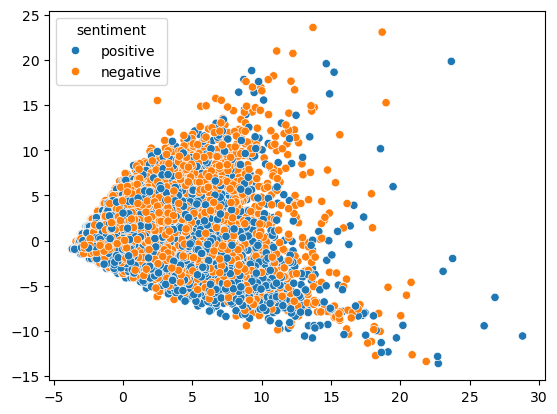

In [ ]:
sns.scatterplot(
    x = pca_result[:,0],
    y = pca_result[:,1],
    hue = imdb_df['sentiment']
)
plt.show()